In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the file

In [6]:

# Path of the file to read
#csv_file_path = "D:/REDI/Data_Circle/data/training_set_values.csv"
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/training_set_values.csv"
# Fill in the line below to read the file into a variable home_data
pump_data = pd.read_csv(csv_file_path)


Rows are not in Tanzania

In [7]:
mask_invalid = (
    (pump_data["latitude"].isna()) |
    (pump_data["longitude"].isna()) |
    (pump_data["latitude"] < -12) |
    (pump_data["latitude"] > 0) |
    (pump_data["longitude"] < 29) |
    (pump_data["longitude"] > 41)
)

invalid_rows = pump_data[mask_invalid]
print(f"Number of invalid rows: {len(invalid_rows)}")
pump_data.drop(invalid_rows.index, inplace=True)
print(f"After deletion: {len(pump_data)} rows remain")

Number of invalid rows: 1812
After deletion: 57588 rows remain


In [8]:
pump_data_labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training_set_labels.csv")
print(pump_data_labels.dtypes)
display(pump_data_labels.head(5))
print("Rows, Cols:", pump_data_labels.shape)

id               int64
status_group    object
dtype: object


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Rows, Cols: (59400, 2)


In [9]:
pump_data_merged = pd.merge(pump_data, pump_data_labels, on="id", how="left")

In [10]:
pump_data_merged.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [11]:
#first five rows of the data
display(pump_data_merged.head(5))
display(pump_data_merged.tail(5))

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
57583,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
57584,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
57585,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
57586,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
57587,26348,0.0,23/03/2011,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [12]:
# Get the summary statistics of the data
pump_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1341.577360
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,937.641368
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,1988.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
print("Rows, Cols:", pump_data.shape)

Rows, Cols: (57588, 40)


In [14]:
print("\nDtypes:")
print(pump_data.dtypes)


Dtypes:
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
p

In [15]:
def column_summary(df, col, top_n=10):
    # Basic column stats
    print(f"\n🔹 Total row: {len(df)} ")
    print(f"\n🔹 Column: {col} ")
    print("Null values:", df[col].isna().sum())
    print("Empty strings:", (df[col] == '').sum())
    print("Unique values:",df[col].nunique())

    # Top values + percentages
    value_counts = df[col].value_counts(dropna=False).head(top_n)
    percent = (value_counts / len(df) * 100).round(2)
    top_summary = pd.DataFrame({
        "value": value_counts.index,
        "count": value_counts.values,
        "percent": percent.values
    })


    print("-" * 45)
    print(f"Top {top_n} most frequent values:")
    print(top_summary.to_string(index=False))

    return
column_summary(pump_data, "funder")



🔹 Total row: 57588 

🔹 Column: funder 
Null values: 3624
Empty strings: 0
Unique values: 1857
---------------------------------------------
Top 10 most frequent values:
                 value  count  percent
Government Of Tanzania   8842    15.35
                   NaN   3624     6.29
                Danida   3114     5.41
                Hesawa   1914     3.32
            World Bank   1345     2.34
                  Kkkt   1287     2.23
          World Vision   1224     2.13
                 Rwssp   1187     2.06
                Unicef   1035     1.80
      District Council    843     1.46


In [16]:
column_summary(pump_data, "wpt_name")


🔹 Total row: 57588 

🔹 Column: wpt_name 
Null values: 2
Empty strings: 0
Unique values: 36719
---------------------------------------------
Top 10 most frequent values:
          value  count  percent
           none   3492     6.06
        Shuleni   1734     3.01
       Zahanati    814     1.41
      Msikitini    533     0.93
       Kanisani    322     0.56
         Sokoni    256     0.44
        Ofisini    245     0.43
Shule Ya Msingi    199     0.35
         School    197     0.34
        Bombani    155     0.27


In [17]:
column_summary(pump_data, "num_private")


🔹 Total row: 57588 

🔹 Column: num_private 
Null values: 0
Empty strings: 0
Unique values: 65
---------------------------------------------
Top 10 most frequent values:
 value  count  percent
     0  56831    98.69
     6     81     0.14
     1     73     0.13
     5     46     0.08
     8     46     0.08
    32     40     0.07
    45     36     0.06
    15     35     0.06
    39     30     0.05
    93     28     0.05


In [18]:
column_summary(pump_data, "ward")


🔹 Total row: 57588 

🔹 Column: ward 
Null values: 0
Empty strings: 0
Unique values: 2033
---------------------------------------------
Top 10 most frequent values:
       value  count  percent
       Igosi    307     0.53
    Imalinyi    252     0.44
   Siha Kati    232     0.40
      Mdandu    231     0.40
     Nduruma    217     0.38
     Kitunda    203     0.35
     Mishamo    203     0.35
      Msindo    201     0.35
    Chalinze    196     0.34
Maji ya Chai    190     0.33


In [19]:
column_summary(pump_data, "region")


🔹 Total row: 57588 

🔹 Column: region 
Null values: 0
Empty strings: 0
Unique values: 21
---------------------------------------------
Top 10 most frequent values:
      value  count  percent
     Iringa   5294     9.19
      Mbeya   4639     8.06
Kilimanjaro   4379     7.60
   Morogoro   4006     6.96
  Shinyanga   3977     6.91
     Arusha   3350     5.82
     Kagera   3316     5.76
     Kigoma   2816     4.89
     Ruvuma   2640     4.58
      Pwani   2635     4.58


In [20]:
pump_data["region"].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [21]:
column_summary(pump_data, "region_code")


🔹 Total row: 57588 

🔹 Column: region_code 
Null values: 0
Empty strings: 0
Unique values: 27
---------------------------------------------
Top 10 most frequent values:
 value  count  percent
    11   5297     9.20
    12   4639     8.06
     3   4379     7.60
     5   4040     7.02
    17   3954     6.87
    18   3324     5.77
     2   3024     5.25
    16   2816     4.89
    10   2640     4.58
     4   2513     4.36


In [58]:
region_stats = (
    pump_data
    .groupby(["region", "region_code"], dropna=False)
    .size()
    .reset_index(name="count")
    .sort_values(["region", "region_code"])
)

region_stats

,region,region_code,count
0,Arusha,2,3024
1,Arusha,24,326
2,Dar es Salaam,7,805
3,Dodoma,1,2201
4,Iringa,11,5294
5,Kagera,18,3316
6,Kigoma,16,2816
7,Kilimanjaro,3,4379
8,Lindi,8,300
9,Lindi,18,8


In [22]:
column_summary(pump_data, "lga")


🔹 Total row: 57588 

🔹 Column: lga 
Null values: 0
Empty strings: 0
Unique values: 124
---------------------------------------------
Top 10 most frequent values:
        value  count  percent
       Njombe   2503     4.35
 Arusha Rural   1252     2.17
  Moshi Rural   1251     2.17
       Rungwe   1106     1.92
       Kilosa   1094     1.90
       Kasulu   1047     1.82
        Mbozi   1034     1.80
         Meru   1009     1.75
     Bagamoyo    997     1.73
Singida Rural    995     1.73


In [59]:
column_summary(pump_data, "basin")


🔹 Total row: 57588 

🔹 Column: basin 
Null values: 0
Empty strings: 0
Unique values: 9
---------------------------------------------
Top 10 most frequent values:
                  value  count  percent
                Pangani   8940    15.52
          Lake Victoria   8535    14.82
                 Rufiji   7976    13.85
               Internal   7785    13.52
        Lake Tanganyika   6333    11.00
            Wami / Ruvu   5987    10.40
             Lake Nyasa   5085     8.83
Ruvuma / Southern Coast   4493     7.80
             Lake Rukwa   2454     4.26


In [60]:
pump_data["basin"].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

In [61]:
column_summary(pump_data, "subvillage")


🔹 Total row: 57588 

🔹 Column: subvillage 
Null values: 371
Empty strings: 0
Unique values: 18567
---------------------------------------------
Top 10 most frequent values:
   value  count  percent
 Majengo    494     0.86
 Shuleni    492     0.85
Madukani    435     0.76
     NaN    371     0.64
    Kati    366     0.64
 Mtakuja    257     0.45
  Sokoni    228     0.40
       M    187     0.32
Muungano    170     0.30
 Mbuyuni    164     0.28


In [62]:
column_summary(pump_data, "ward")


🔹 Total row: 57588 

🔹 Column: ward 
Null values: 0
Empty strings: 0
Unique values: 2033
---------------------------------------------
Top 10 most frequent values:
       value  count  percent
       Igosi    307     0.53
    Imalinyi    252     0.44
   Siha Kati    232     0.40
      Mdandu    231     0.40
     Nduruma    217     0.38
     Kitunda    203     0.35
     Mishamo    203     0.35
      Msindo    201     0.35
    Chalinze    196     0.34
Maji ya Chai    190     0.33


In [23]:
column_summary(pump_data, "public_meeting")


🔹 Total row: 57588 

🔹 Column: public_meeting 
Null values: 2976
Empty strings: 0
Unique values: 2
---------------------------------------------
Top 10 most frequent values:
value  count  percent
 True  49737    86.37
False   4875     8.47
  NaN   2976     5.17


In [24]:
column_summary(pump_data, "recorded_by")


🔹 Total row: 57588 

🔹 Column: recorded_by 
Null values: 0
Empty strings: 0
Unique values: 1
---------------------------------------------
Top 10 most frequent values:
                  value  count  percent
GeoData Consultants Ltd  57588    100.0


In [25]:
column_summary(pump_data, "scheme_management")


🔹 Total row: 57588 

🔹 Column: scheme_management 
Null values: 3751
Empty strings: 0
Unique values: 11
---------------------------------------------
Top 10 most frequent values:
           value  count  percent
             VWC  36143    62.76
             WUG   4249     7.38
             NaN   3751     6.51
 Water authority   3151     5.47
             WUA   2882     5.00
     Water Board   2747     4.77
      Parastatal   1607     2.79
Private operator   1063     1.85
         Company   1061     1.84
           Other    765     1.33


In [26]:
column_summary(pump_data, "scheme_name")


🔹 Total row: 57588 

🔹 Column: scheme_name 
Null values: 27336
Empty strings: 0
Unique values: 2657
---------------------------------------------
Top 10 most frequent values:
                      value  count  percent
                        NaN  27336    47.47
                          K    682     1.18
                   Borehole    418     0.73
              Chalinze wate    405     0.70
                          M    400     0.69
                     DANIDA    379     0.66
                 Government    320     0.56
Ngana water supplied scheme    270     0.47
wanging'ombe water supply s    261     0.45
 wanging'ombe supply scheme    234     0.41


In [27]:
column_summary(pump_data, "permit")


🔹 Total row: 57588 

🔹 Column: permit 
Null values: 3056
Empty strings: 0
Unique values: 2
---------------------------------------------
Top 10 most frequent values:
value  count  percent
 True  38100    66.16
False  16432    28.53
  NaN   3056     5.31


In [28]:
column_summary(pump_data, "construction_year")


🔹 Total row: 57588 

🔹 Column: construction_year 
Null values: 0
Empty strings: 0
Unique values: 55
---------------------------------------------
Top 10 most frequent values:
 value  count  percent
     0  18897    32.81
  2010   2645     4.59
  2008   2613     4.54
  2009   2533     4.40
  2000   2091     3.63
  2007   1587     2.76
  2006   1471     2.55
  2003   1286     2.23
  2011   1256     2.18
  2004   1123     1.95


In [65]:
print("Empty year:", (pump_data["construction_year"] == 0).sum())

Empty year: 18897


In [29]:
column_summary(pump_data, "extraction_type")


🔹 Total row: 57588 

🔹 Column: extraction_type 
Null values: 0
Empty strings: 0
Unique values: 18
---------------------------------------------
Top 10 most frequent values:
            value  count  percent
          gravity  26696    46.36
      nira/tanira   7361    12.78
            other   6160    10.70
      submersible   4688     8.14
           swn 80   3448     5.99
             mono   2817     4.89
    india mark ii   2284     3.97
          afridev   1659     2.88
              ksb   1358     2.36
other - rope pump    451     0.78


In [30]:
column_summary(pump_data, "extraction_type_group")


🔹 Total row: 57588 

🔹 Column: extraction_type_group 
Null values: 0
Empty strings: 0
Unique values: 13
---------------------------------------------
Top 10 most frequent values:
         value  count  percent
       gravity  26696    46.36
   nira/tanira   7361    12.78
         other   6160    10.70
   submersible   6046    10.50
        swn 80   3448     5.99
          mono   2817     4.89
 india mark ii   2284     3.97
       afridev   1659     2.88
     rope pump    451     0.78
other handpump    336     0.58


In [31]:
column_summary(pump_data, "extraction_type_class")


🔹 Total row: 57588 

🔹 Column: extraction_type_class 
Null values: 0
Empty strings: 0
Unique values: 7
---------------------------------------------
Top 10 most frequent values:
       value  count  percent
     gravity  26696    46.36
    handpump  15179    26.36
       other   6160    10.70
 submersible   6046    10.50
   motorpump   2939     5.10
   rope pump    451     0.78
wind-powered    117     0.20


In [32]:
column_summary(pump_data, "management")


🔹 Total row: 57588 

🔹 Column: management 
Null values: 0
Empty strings: 0
Unique values: 12
---------------------------------------------
Top 10 most frequent values:
           value  count  percent
             vwc  39746    69.02
             wug   5556     9.65
     water board   2932     5.09
             wua   2533     4.40
private operator   1970     3.42
      parastatal   1696     2.95
 water authority    902     1.57
           other    840     1.46
         company    685     1.19
         unknown    551     0.96


In [33]:
column_summary(pump_data, "management_group")


🔹 Total row: 57588 

🔹 Column: management_group 
Null values: 0
Empty strings: 0
Unique values: 5
---------------------------------------------
Top 10 most frequent values:
     value  count  percent
user-group  50767    88.16
commercial   3635     6.31
parastatal   1696     2.95
     other    939     1.63
   unknown    551     0.96


In [34]:
column_summary(pump_data, "payment")


🔹 Total row: 57588 

🔹 Column: payment 
Null values: 0
Empty strings: 0
Unique values: 7
---------------------------------------------
Top 10 most frequent values:
                value  count  percent
            never pay  24380    42.34
       pay per bucket   8953    15.55
          pay monthly   8229    14.29
              unknown   7654    13.29
pay when scheme fails   3843     6.67
         pay annually   3626     6.30
                other    903     1.57


In [35]:
column_summary(pump_data, "payment_type")


🔹 Total row: 57588 

🔹 Column: payment_type 
Null values: 0
Empty strings: 0
Unique values: 7
---------------------------------------------
Top 10 most frequent values:
     value  count  percent
 never pay  24380    42.34
per bucket   8953    15.55
   monthly   8229    14.29
   unknown   7654    13.29
on failure   3843     6.67
  annually   3626     6.30
     other    903     1.57


In [36]:
column_summary(pump_data, "water_quality")


🔹 Total row: 57588 

🔹 Column: water_quality 
Null values: 0
Empty strings: 0
Unique values: 8
---------------------------------------------
Top 10 most frequent values:
             value  count  percent
              soft  49431    85.84
             salty   4772     8.29
           unknown   1661     2.88
             milky    803     1.39
          coloured    479     0.83
   salty abandoned    228     0.40
          fluoride    199     0.35
fluoride abandoned     15     0.03


In [37]:
column_summary(pump_data, "quality_group")


🔹 Total row: 57588 

🔹 Column: quality_group 
Null values: 0
Empty strings: 0
Unique values: 6
---------------------------------------------
Top 10 most frequent values:
   value  count  percent
    good  49431    85.84
   salty   5000     8.68
 unknown   1661     2.88
   milky    803     1.39
 colored    479     0.83
fluoride    214     0.37


In [38]:
column_summary(pump_data, "quantity")


🔹 Total row: 57588 

🔹 Column: quantity 
Null values: 0
Empty strings: 0
Unique values: 5
---------------------------------------------
Top 10 most frequent values:
       value  count  percent
      enough  32260    56.02
insufficient  14564    25.29
         dry   5990    10.40
    seasonal   4001     6.95
     unknown    773     1.34


In [39]:
column_summary(pump_data, "quantity_group")


🔹 Total row: 57588 

🔹 Column: quantity_group 
Null values: 0
Empty strings: 0
Unique values: 5
---------------------------------------------
Top 10 most frequent values:
       value  count  percent
      enough  32260    56.02
insufficient  14564    25.29
         dry   5990    10.40
    seasonal   4001     6.95
     unknown    773     1.34


In [40]:
column_summary(pump_data, "source")


🔹 Total row: 57588 

🔹 Column: source 
Null values: 0
Empty strings: 0
Unique values: 10
---------------------------------------------
Top 10 most frequent values:
               value  count  percent
              spring  17006    29.53
        shallow well  15499    26.91
         machine dbh  10826    18.80
               river   9612    16.69
rainwater harvesting   2218     3.85
            hand dtw    873     1.52
                 dam    649     1.13
                lake    639     1.11
               other    202     0.35
             unknown     64     0.11


In [41]:
column_summary(pump_data, "source_type")


🔹 Total row: 57588 

🔹 Column: source_type 
Null values: 0
Empty strings: 0
Unique values: 7
---------------------------------------------
Top 10 most frequent values:
               value  count  percent
              spring  17006    29.53
        shallow well  15499    26.91
            borehole  11699    20.31
          river/lake  10251    17.80
rainwater harvesting   2218     3.85
                 dam    649     1.13
               other    266     0.46


In [42]:
column_summary(pump_data, "source_class")


🔹 Total row: 57588 

🔹 Column: source_class 
Null values: 0
Empty strings: 0
Unique values: 3
---------------------------------------------
Top 10 most frequent values:
      value  count  percent
groundwater  44204    76.76
    surface  13118    22.78
    unknown    266     0.46


In [43]:
column_summary(pump_data, "waterpoint_type")


🔹 Total row: 57588 

🔹 Column: waterpoint_type 
Null values: 0
Empty strings: 0
Unique values: 7
---------------------------------------------
Top 10 most frequent values:
                      value  count  percent
         communal standpipe  28375    49.27
                  hand pump  16181    28.10
                      other   6167    10.71
communal standpipe multiple   5959    10.35
            improved spring    783     1.36
              cattle trough    116     0.20
                        dam      7     0.01


In [44]:
column_summary(pump_data, "waterpoint_type_group")


🔹 Total row: 57588 

🔹 Column: waterpoint_type_group 
Null values: 0
Empty strings: 0
Unique values: 6
---------------------------------------------
Top 10 most frequent values:
             value  count  percent
communal standpipe  34334    59.62
         hand pump  16181    28.10
             other   6167    10.71
   improved spring    783     1.36
     cattle trough    116     0.20
               dam      7     0.01


In [45]:
column_summary(pump_data, "date_recorded")
pump_data["date_recorded"].dtype


🔹 Total row: 57588 

🔹 Column: date_recorded 
Null values: 0
Empty strings: 0
Unique values: 353
---------------------------------------------
Top 10 most frequent values:
     value  count  percent
15/03/2011    572     0.99
17/03/2011    558     0.97
03/02/2013    545     0.95
14/03/2011    520     0.90
16/03/2011    513     0.89
18/03/2011    497     0.86
19/03/2011    466     0.81
04/03/2011    458     0.80
05/03/2011    434     0.75
24/01/2013    433     0.75


dtype('O')

In [46]:
column_summary(pump_data_merged, "status_group")


🔹 Total row: 57588 

🔹 Column: status_group 
Null values: 0
Empty strings: 0
Unique values: 3
---------------------------------------------
Top 10 most frequent values:
                  value  count  percent
             functional  31389    54.51
         non functional  22268    38.67
functional needs repair   3931     6.83


In [47]:
df_func = pump_data_merged[pump_data_merged["status_group"] == "functional"]
df_func["waterpoint_type"].value_counts().head(5)

,count
waterpoint_type,
communal standpipe,17647
hand pump,10042
communal standpipe multiple,2211
other,836
improved spring,563


there are 9 rows that date recorded less than year construction

In [48]:
filtered = pump_data[
    pump_data["date_recorded"].str[-4:].astype(int)
    < pump_data["construction_year"]
]
print(len(filtered))

9


These columns are redundant, we can delete them:
- waterpoint_type_group(=waterpoint_type)
- source_class(=source_type)
- source (=source_type, but without unknown)
- quantity_group(=quantity)
- quality_group (=water_quality)
- payment_type(=payment)
- management_group(=management)
- extraction_type_group
- extraction_type_class
- scheme_name(because 48,5% are NULL)
- recorded_by  (because only one value)
- public_meeting (92% the same value)
- num_private(98,3% unique value)
- wpt_name?(because its only name, no information)
- date_recorded

 Questions:
1) why region <> region_code (should be equal)
2) how connected basin,subvillage,region,district_code,lga,ward
3) should we limit datas with langitude and latitude that belongs to Tanzania
4) check the correct years: construction_year <=date_recorded
5) ideal row
6) what to do with 0 construction_year

In [49]:
cols_to_drop = ["wpt_name","waterpoint_type_group", "source_class", "source","quantity_group", "quality_group", "payment_type","management_group", "extraction_type_group", "extraction_type_class","scheme_name", "recorded_by", "public_meeting","num_private", "date_recorded"]
pump_data.drop(columns=cols_to_drop, inplace=True)

In [50]:
pump_data_merged = pd.merge(pump_data, pump_data_labels, on="id", how="left")

In [51]:
null_pct = pump_data_merged.isna().mean().sort_values(ascending=False).to_frame("null_fraction")
display(null_pct.style.background_gradient(cmap="Reds").format("{:.1%}"))

,null_fraction
scheme_management,6.5%
installer,6.3%
funder,6.3%
permit,5.3%
subvillage,0.6%
id,0.0%
longitude,0.0%
latitude,0.0%
amount_tsh,0.0%
gps_height,0.0%


In [52]:
dup_any = pump_data_merged.duplicated().sum()
print(f"\nDuplicate full rows: {dup_any}")


Duplicate full rows: 0


In [53]:
from re import I
# 6) Numeric summary
ID_COLUMNS = ["id","district_code","region_code"]
cat_cols = pump_data_merged.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = pump_data_merged.select_dtypes(include=[np.number]).columns.tolist()
if ID_COLUMNS:
    num_cols = [c for c in num_cols if c not in ID_COLUMNS]
if num_cols:
    print("\nNumeric columns:", num_cols[:15], "…" if len(num_cols) > 15 else "")
    display(pump_data_merged[num_cols].describe().T)


Numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year'] 


,count,mean,std,min,25%,50%,75%,max
amount_tsh,57588.0,327.645219,3043.831403,0.000000,0.000000,0.000000,30.000000,350000.000000
gps_height,57588.0,689.325137,693.564188,-90.000000,0.000000,426.000000,1332.000000,2770.000000
longitude,57588.0,35.149669,2.607428,29.607122,33.285100,35.005943,37.233712,40.345193
latitude,57588.0,-5.885572,2.809876,-11.649440,-8.643841,-5.172704,-3.372824,-0.998464
population,57588.0,185.570831,477.744239,0.000000,0.000000,35.000000,230.000000,30500.000000
construction_year,57588.0,1341.577360,937.641368,0.000000,0.000000,1988.000000,2004.000000,2013.000000


In [54]:
# 7) Categorical summary (top categories + cardinality)
DATE_COLUMNS = ["date_recorded"]
cat_cols = pump_data_merged.select_dtypes(include=["object", "category"]).columns.tolist()
if DATE_COLUMNS:
    # ensure we don’t treat parsed date columns as categorical
    cat_cols = [c for c in cat_cols if c not in DATE_COLUMNS]
if cat_cols:
    print("\nCategorical columns:", cat_cols[:15], "…" if len(cat_cols) > 15 else "")
    cat_card = pump_data_merged[cat_cols].nunique().sort_values(ascending=False).to_frame("n_unique")
    display(cat_card.style.background_gradient(cmap="Blues"))
    # top values preview
    for c in cat_cols[:10]:
        print(f"\nTop values for {c}:")
        print(pump_data_merged[c].value_counts(dropna=False).head(10))


Categorical columns: ['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'permit', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source_type'] …


,n_unique
subvillage,18567
installer,2113
ward,2033
funder,1857
lga,124
region,21
extraction_type,18
management,12
scheme_management,11
basin,9



Top values for funder:
funder
Government Of Tanzania    8842
NaN                       3624
Danida                    3114
Hesawa                    1914
World Bank                1345
Kkkt                      1287
World Vision              1224
Rwssp                     1187
Unicef                    1035
District Council           843
Name: count, dtype: int64

Top values for installer:
installer
DWE           16255
NaN            3636
Government     1670
RWE            1181
Commu          1060
DANIDA         1050
KKKT            897
Hesawa          803
0               777
TCRS            707
Name: count, dtype: int64

Top values for basin:
basin
Pangani                    8940
Lake Victoria              8535
Rufiji                     7976
Internal                   7785
Lake Tanganyika            6333
Wami / Ruvu                5987
Lake Nyasa                 5085
Ruvuma / Southern Coast    4493
Lake Rukwa                 2454
Name: count, dtype: int64

Top values for subvillage:

In [55]:
# 8) Correlations (numeric)
corr = pump_data_merged[num_cols].corr(numeric_only=True)
print("\nCorrelation (Pearson):")
display(corr.round(2))


Correlation (Pearson):


,amount_tsh,gps_height,longitude,latitude,population,construction_year
amount_tsh,1.00,0.07,0.01,-0.05,0.02,0.07
gps_height,0.07,1.00,-0.02,0.02,0.13,0.65
longitude,0.01,-0.02,1.00,-0.30,0.06,0.46
latitude,-0.05,0.02,-0.30,1.00,0.00,-0.18
population,0.02,0.13,0.06,0.00,1.00,0.25
construction_year,0.07,0.65,0.46,-0.18,0.25,1.00


In [56]:
# 9) Outlier hint: simple z-score flag on numeric columns
def outlier_share(series, z=3.0):
    s = series.dropna()
    if s.std(ddof=0) == 0:
        return 0.0
    zscores = (s - s.mean()) / s.std(ddof=0)
    return (np.abs(zscores) > z).mean()

outlier_report = []
for col in num_cols:
    share = outlier_share(pump_data[col], z=3.0)
    outlier_report.append((col, share))
outliers_df = pd.DataFrame(outlier_report, columns=["column", "outlier_fraction"]).sort_values("outlier_fraction", ascending=False)
print("\nOutlier fraction by column (|z|>3):")
display(outliers_df.head(20).style.format({"outlier_fraction": "{:.2%}"}).background_gradient(cmap="Oranges"))



Outlier fraction by column (|z|>3):


,column,outlier_fraction
4,population,1.22%
0,amount_tsh,0.41%
1,gps_height,0.00%
2,longitude,0.00%
3,latitude,0.00%
5,construction_year,0.00%


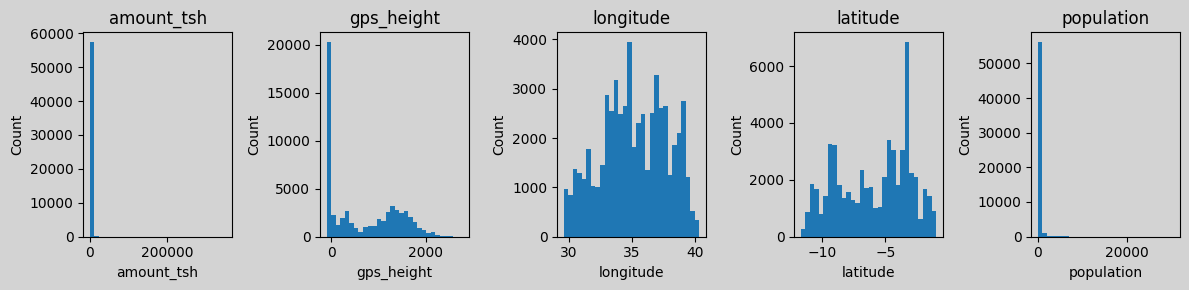

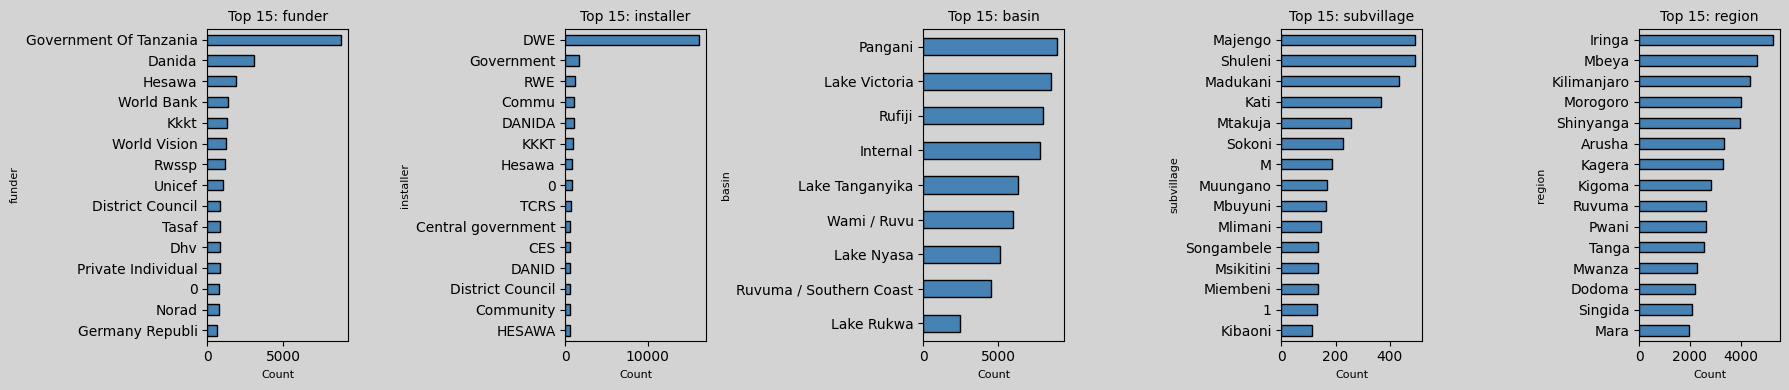

In [57]:
# 10) Quick plots (optional; remove if running in headless env)
# Histogram for first few numeric columns
cols_to_plot = num_cols[:5]   # first 5 numeric columns

fig, axes = plt.subplots(1, 5, figsize=(12, 3))  # 1 row, 5 columns
fig.patch.set_facecolor("lightgrey")

for i, col in enumerate(cols_to_plot):
    axes[i].hist(pump_data[col].dropna(), bins=30)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].set_facecolor("lightgrey")
plt.tight_layout()
plt.show()

# Bar chart for top categories in first 5 categorical column
cols_to_plot = cat_cols[:5]   # first 5 categorical columns

fig, axes = plt.subplots(1, 5, figsize=(18, 4))  # 1 row, 5 plots
fig.patch.set_facecolor("lightgrey")
for i, c in enumerate(cols_to_plot):
    pump_data[c].value_counts().head(15).sort_values().plot.barh(
        ax=axes[i], color="steelblue", edgecolor="black"
    )
    axes[i].set_title(f"Top 15: {c}", fontsize=10)
    axes[i].set_xlabel("Count", fontsize=8)
    axes[i].set_ylabel(c, fontsize=8)
    axes[i].set_facecolor("lightgrey")   # light grey background

plt.tight_layout()
plt.show()
